In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B69C-5907

 Directory of C:\Users\Admin\Desktop\Traffic_Sign_Recongnition

08-06-2024  11:36    <DIR>          .
08-06-2024  11:36    <DIR>          ..
08-06-2024  11:34             6,148 .DS_Store
08-06-2024  11:34    <DIR>          .ipynb_checkpoints
08-06-2024  11:36    <DIR>          data
08-06-2024  11:34       341,165,959 data.zip
08-06-2024  11:34             4,650 GUI_Traffic_Sign_Classification.py
08-06-2024  11:34         1,436,016 traffic_classifier_model.h5
08-06-2024  11:34            90,829 Traffic_Sign_Recongnition.ipynb
               5 File(s)    342,703,602 bytes
               4 Dir(s)  22,673,702,912 bytes free


In [3]:
cd \Users\Admin\Desktop\Traffic_Sign_Recongnition

C:\Users\Admin\Desktop\Traffic_Sign_Recongnition


In [1]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D


# Function to load and preprocess images
def load_images_from_directory(path, image_size=(30, 30)):
    images = os.listdir(path)
    data = []
    labels = []
    class_id = int(path.split('\\')[-1])

    for image_filename in images:
        try:
            image = Image.open(os.path.join(path, image_filename))
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(class_id)
        except:
            print(f"Error loading image: {os.path.join(path, image_filename)}")

    return data, labels

# Retrieving the images and their labels
data = []
labels = []
num_classes = 43
current_path = os.getcwd()

for class_id in range(num_classes):
    path = os.path.join(current_path, 'data/Train', str(class_id))
    class_data, class_labels = load_images_from_directory(path)
    data.extend(class_data)
    labels.extend(class_labels)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Replace the Flatten layer with GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

# Optionally, you can add more Dense layers with BatchNormalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Make sure num_classes is defined properly for your specific problem
model.add(Dense(num_classes, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_one_hot))
#model.save("model.h5")


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/15
981/981 [==============================] - 103s 102ms/step - loss: 1.6239 - accuracy: 0.5683 - val_loss: 0.3689 - val_accuracy: 0.8860
Epoch 2/15
981/981 [==============================] - 102s 104ms/step - loss: 0.2810 - accuracy: 0.9159 - val_loss: 0.1020 - val_accuracy: 0.9656
Epoch 3/15
981/981 [==============================] - 103s 105ms/step - loss: 0.1583 - accuracy: 0.9516 - val_loss: 0.0551 - val_accuracy: 0.9823
Epoch 4/15
981/981 [==============================] - 103s 105ms/step - loss: 0.1142 - accuracy: 0.9659 - val_loss: 0.0512 - val_accuracy: 0.9834
Epoch 5/15
981/981 [==============================] - 103s 105ms/step - loss: 0.0929 - accuracy: 0.9720 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 6/15
981/981 [==============================] - 104s 106ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0154 - val_accuracy: 0.9954
Epoch 7/15
981/981 [======================

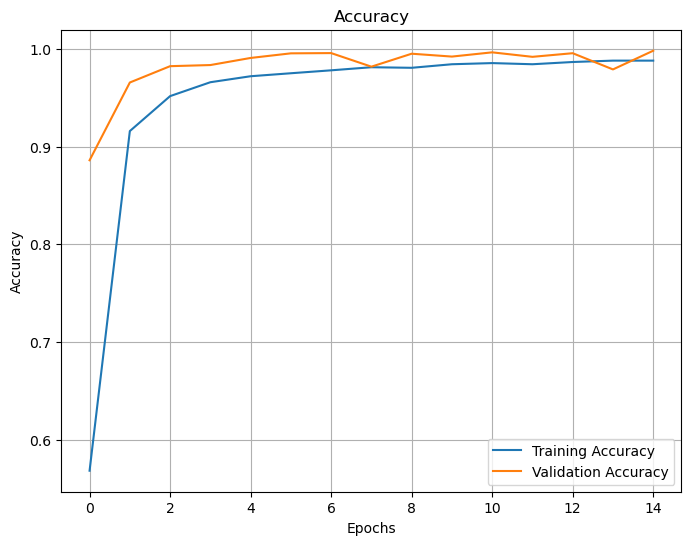

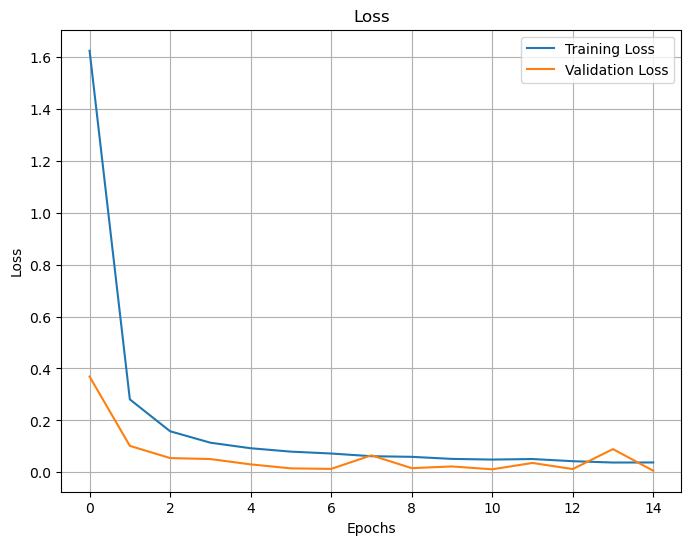

In [2]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting graphs for accuracy and loss
plot_accuracy(history)
plot_loss(history)


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B69C-5907

 Directory of C:\Users\Admin\Desktop\Traffic_Sign_Recongnition

08-06-2024  14:08    <DIR>          .
08-06-2024  14:08    <DIR>          ..
08-06-2024  11:34             6,148 .DS_Store
08-06-2024  11:34    <DIR>          .ipynb_checkpoints
08-06-2024  13:15    <DIR>          data
08-06-2024  11:34             4,650 GUI_Traffic_Sign_Classification.py
08-06-2024  11:34         1,436,016 traffic_classifier_model.h5
08-06-2024  14:08            91,222 Traffic_Sign_Recongnition.ipynb
               4 File(s)      1,538,036 bytes
               4 Dir(s)  40,899,768,320 bytes free


In [4]:
cd data

C:\Users\Admin\Desktop\Traffic_Sign_Recongnition\data


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B69C-5907

 Directory of C:\Users\Admin\Desktop\Traffic_Sign_Recongnition\data

08-06-2024  13:15    <DIR>          .
08-06-2024  13:15    <DIR>          ..
08-06-2024  13:09             6,148 .DS_Store
08-06-2024  13:15    <DIR>          Meta
08-06-2024  13:09             1,033 Meta.csv
08-06-2024  13:15    <DIR>          Test
08-06-2024  13:09           427,897 Test.csv
08-06-2024  13:33    <DIR>          Train
08-06-2024  13:09         1,940,896 Train.csv
               4 File(s)      2,375,974 bytes
               5 Dir(s)  40,899,768,320 bytes free


In [16]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# Make predictions on the test data
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier_model.h5')

395/395 [==============================] - 7s 16ms/step
0.9728424386381631


D:\data\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
